In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (545, 13)


In [ ]:
print(data.head().to_markdown(index=False, numalign="left", stralign="left"))
print(data.info())

| price    | area   | bedrooms   | bathrooms   | stories   | mainroad   | guestroom   | basement   | hotwaterheating   | airconditioning   | parking   | prefarea   | furnishingstatus   |
|:---------|:-------|:-----------|:------------|:----------|:-----------|:------------|:-----------|:------------------|:------------------|:----------|:-----------|:-------------------|
| 13300000 | 7420   | 4          | 2           | 3         | yes        | no          | no         | no                | yes               | 2         | yes        | furnished          |
| 12250000 | 8960   | 4          | 4           | 4         | yes        | no          | no         | no                | yes               | 3         | no         | furnished          |
| 12250000 | 9960   | 3          | 2           | 2         | yes        | no          | yes        | no                | no                | 2         | yes        | semi-furnished     |
| 12215000 | 7500   | 4          | 2           | 2         | yes 

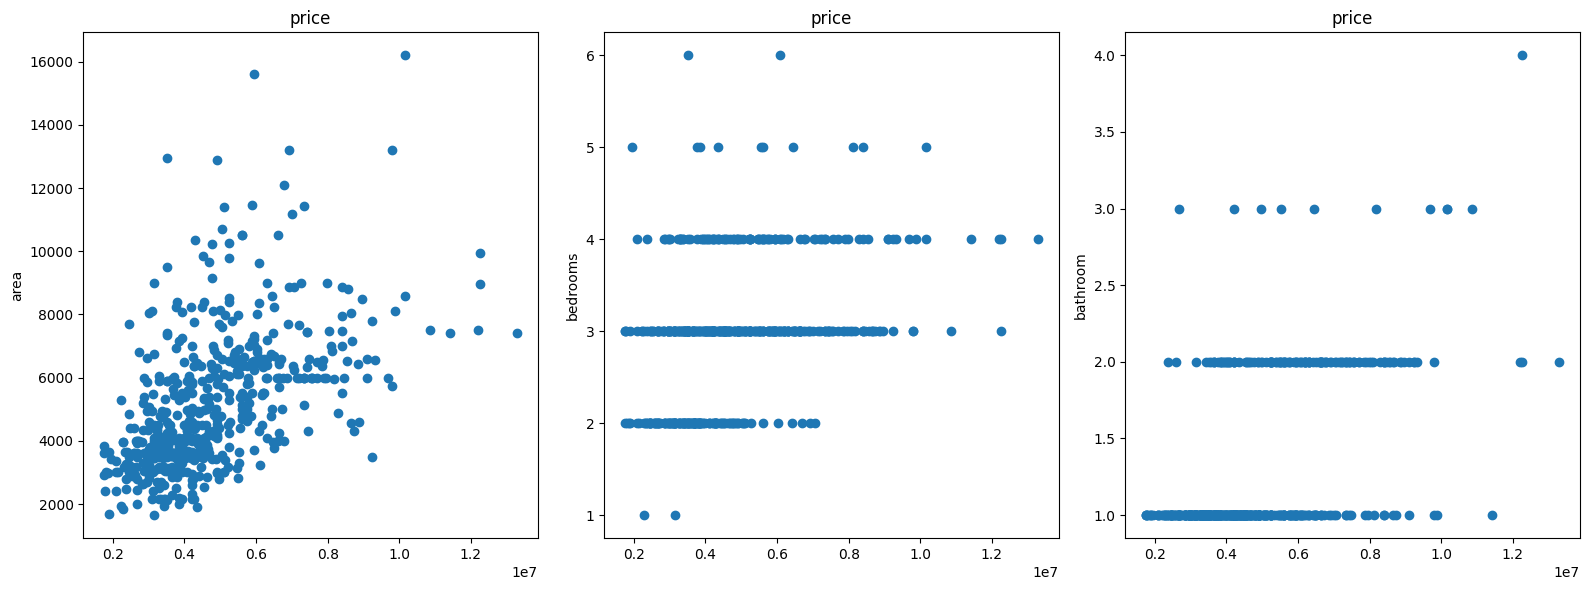

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(data['price'],data['area'],'o')
axes[0].set_ylabel("area")
axes[0].set_title("price")

axes[1].plot(data['price'],data['bedrooms'],'o')
axes[1].set_title("price")
axes[1].set_ylabel("bedrooms")

axes[2].plot(data['price'],data['bathrooms'],'o')
axes[2].set_title("price");
axes[2].set_ylabel("bathroom")
plt.tight_layout();

* ## From the above chat it represents when 'area' increases the 'price' also increase.

* ## The number of bedrooms and bathrooms might have a slight positive effect on price, but their impact is much weaker compared to area.



# **Relationships between features**

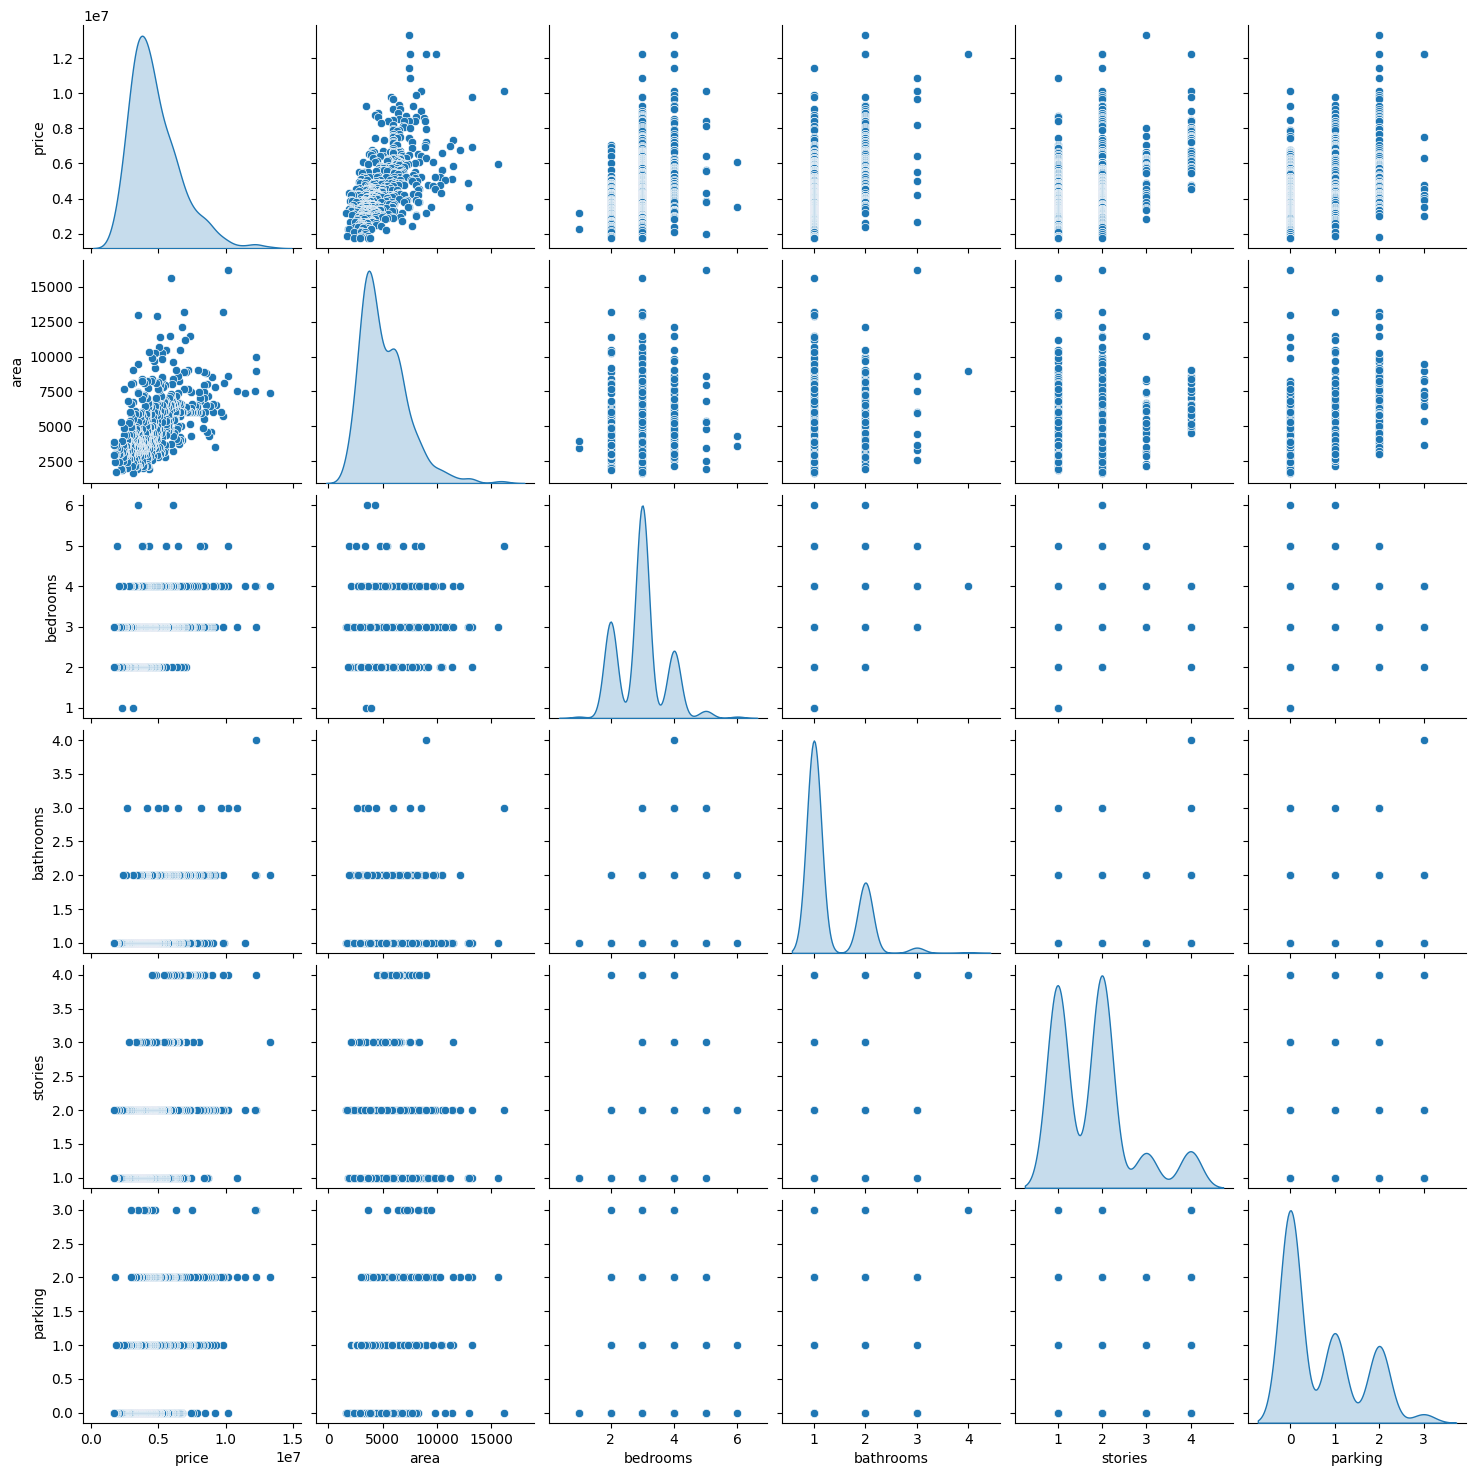

In [ ]:
sns.pairplot(data,diag_kind='kde')

# **Understanding Price Ranges**

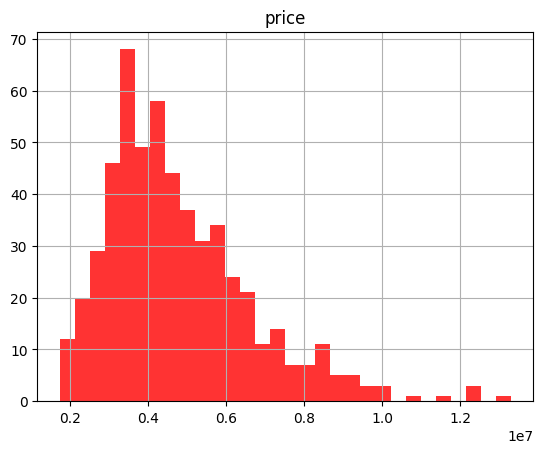

In [ ]:
data.hist(column = ['price'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

# **Checking any null values**

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [ ]:
data['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [ ]:
data['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

# **Turn Categories into numbers**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.mainroad =le.fit_transform(data.mainroad)
data.guestroom = le.fit_transform(data.guestroom)
data.basement = le.fit_transform(data.basement)
data.hotwaterheating = le.fit_transform(data.hotwaterheating)
data.airconditioning = le.fit_transform(data.airconditioning)
data.prefarea = le.fit_transform(data.prefarea)
data.furnishingstatus = le.fit_transform(data.furnishingstatus)

In [ ]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [ ]:
data.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

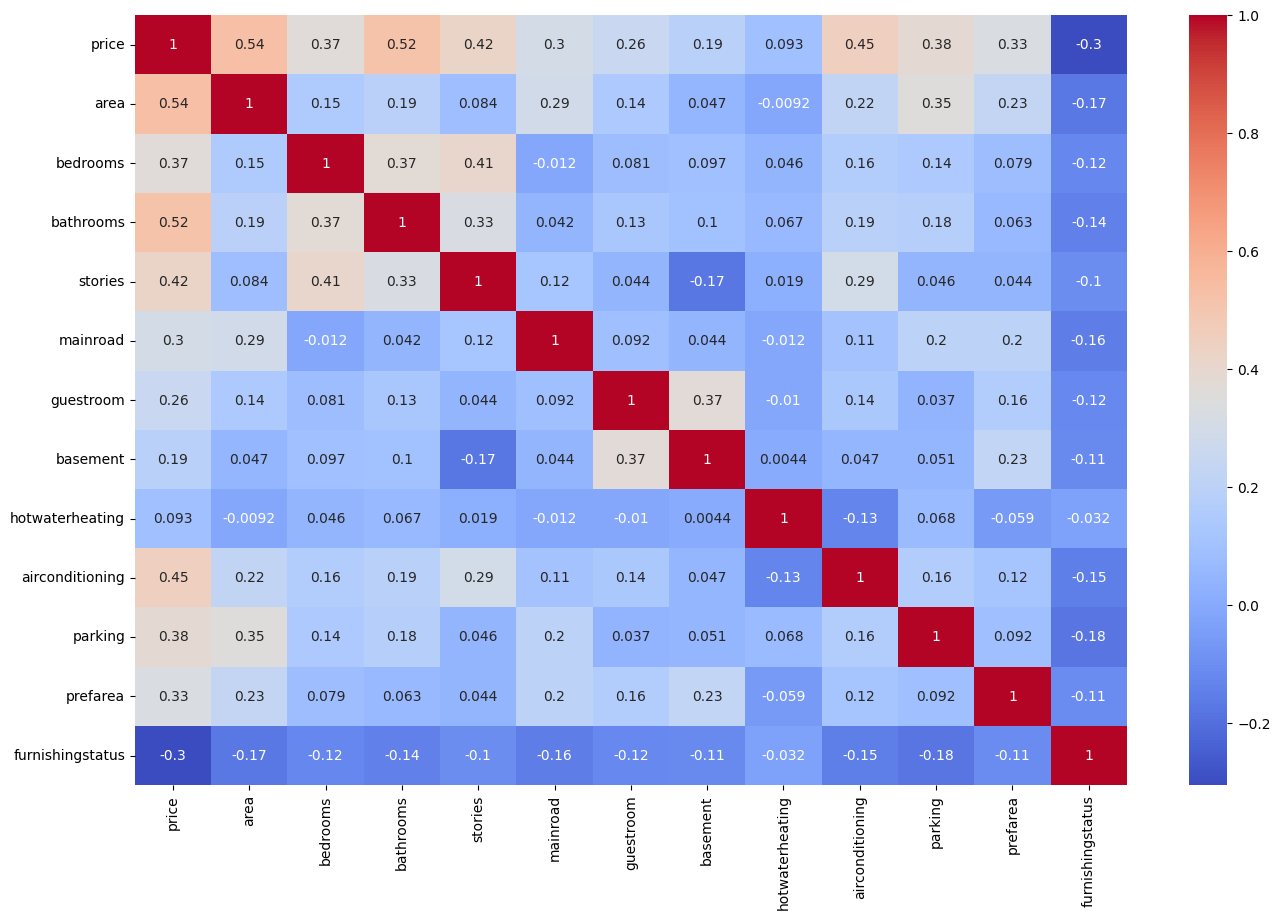

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="coolwarm")
plt.show()

* 'price' and 'area' : The strongest positive correlation indicates that as the area of a house increases, its price also tends to increase significantly.

* 'bedrooms' and 'bathrooms' : Having more bedrooms often comes with more bathrooms, suggesting a strong positive correlation between these two features.

* 'stories' and 'price' : Homes with more stories tend to be more expensive.

* 'mainroad' and 'price' : Houses located on the main road are generally pricier.

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and fit the Random Forest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
model_rf.score(X_test, y_test)

0.6115321143409216

In [ ]:
y_test.mean()

5007536.697247706

In [ ]:
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771, 5007536.69724771, 5007536.69724771,
       5007536.69724771,

In [ ]:
r2_score(y_test, y_test_mean)

0.0

In [ ]:
r2_score(y_test, y_test)

1.0

# **Mean Absolute Error**

In [ ]:
# Make predictions
y_pred_train_rf = model_rf.predict(X_train)
y_pred_rf = model_rf.predict(X_test)


In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

1025289.6821100918

In [ ]:
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df_rf['differences'] = df_rf['Actual'] - df_rf['Predicted']
df_rf

,Actual,Predicted,differences
316,4060000,5211325.00,-1151325.00
77,6650000,7425040.00,-775040.00
360,3710000,3762158.75,-52158.75
90,6440000,4517170.00,1922830.00
493,2800000,3733800.00,-933800.00
...,...,...,...
15,9100000,6513080.00,2586920.00
357,3773000,5524820.00,-1751820.00
39,7910000,7373059.40,536940.60
54,7350000,7357134.40,-7134.40


In [ ]:
# Calculate R-squared
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)


In [ ]:
# Print R-squared
print(f"Random Forest - Training R-squared: {r2_train_rf:.4f}")
print(f"Random Forest - Test R-squared: {r2_test_rf:.4f}")

Random Forest - Training R-squared: 0.9488
Random Forest - Test R-squared: 0.6115


In [ ]:
import altair as alt

In [ ]:
# Create the scatter plot
chart_rf = alt.Chart(df_rf).mark_circle().encode(
    x='Actual',
    y='Predicted',
    tooltip=['Actual', 'Predicted']
).properties(
    title='Actual vs. Predicted House Prices (Random Forest)'
).interactive()

In [ ]:
chart_rf

alt.Chart(...)

In [ ]:
from sklearn.metrics import mean_squared_error #calculating MSE
testingerror=mean_squared_error(y_pred_rf,y_test)
testingerror

1963538216518.6526

In [ ]:
scores_rf = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores_rf)
scores_rf.mean()

[-1.52729027e+12 -1.01563326e+12 -6.26899763e+11 -1.53076439e+12
 -1.42934217e+12]


-1225985970299.5796

# **Linear Regression Model**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and fit the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred_train_lr = model_lr.predict(X_train)
y_pred_lr = model_lr.predict(X_test)


# **Mean Absolute Error**

In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_lr

979679.6912959901

In [ ]:
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df_lr['differences'] = df_lr['Actual'] - df_lr['Predicted']
df_lr

,Actual,Predicted,differences
316,4060000,5.203692e+06,-1.143692e+06
77,6650000,7.257004e+06,-6.070040e+05
360,3710000,3.062829e+06,6.471714e+05
90,6440000,4.559592e+06,1.880408e+06
493,2800000,3.332932e+06,-5.329323e+05
...,...,...,...
15,9100000,4.933137e+06,4.166863e+06
357,3773000,4.377133e+06,-6.041331e+05
39,7910000,7.009335e+06,9.006650e+05
54,7350000,6.351461e+06,9.985390e+05


# **Lasso Model**

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_pred =  lasso_model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, lasso_pred)

979731.664539371

# **Ridge Model**

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_pred =  ridge_model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, ridge_pred)

1007715.6740128455

In [ ]:
# Calculate R-squared
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_lr)

In [ ]:
# Print R-squared
print(f"Linear Regression - Training R-squared: {r2_train_lr:.4f}")
print(f"Linear Regression - Test R-squared: {r2_test_lr:.4f}")


Linear Regression - Training R-squared: 0.6854
Linear Regression - Test R-squared: 0.6495


In [ ]:
chart_lr = alt.Chart(df_lr).mark_circle().encode(
    x='Actual',
    y='Predicted',
    tooltip=['Actual', 'Predicted']
).properties(
    title='Actual vs. Predicted House Prices (Linear Regression)'
).interactive()

chart_lr

alt.Chart(...)

In [ ]:
from sklearn.metrics import mean_squared_error #calculating MSE
testingerror=mean_squared_error(y_pred_lr,y_test)
testingerror

1771751116594.0352

In [ ]:
scores_lr = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores_lr)
scores_lr.mean()

[-1.09744185e+12 -9.42994625e+11 -6.18770456e+11 -1.38562792e+12
 -1.27198031e+12]


-1063363032597.5745

# **Decision Tree Regressor**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and fit the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred_train_dt = model_dt.predict(X_train)
y_pred_dt = model_dt.predict(X_test)

# **Mean Absolute Error**

In [ ]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_dt

1222399.0825688073

In [ ]:
df_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
df_dt['differences'] = df_dt['Actual'] - df_dt['Predicted']
df_dt

,Actual,Predicted,differences
316,4060000,5250000.0,-1190000.0
77,6650000,7840000.0,-1190000.0
360,3710000,3850000.0,-140000.0
90,6440000,4900000.0,1540000.0
493,2800000,2660000.0,140000.0
...,...,...,...
15,9100000,7343000.0,1757000.0
357,3773000,5040000.0,-1267000.0
39,7910000,7560000.0,350000.0
54,7350000,7210000.0,140000.0


In [ ]:
# Calculate R-squared
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_dt)
r2_test_dt

0.4681689010023007

In [ ]:
# Print R-squared
print(f"Decision Tree - Training R-squared: {r2_train_dt:.4f}")
print(f"Decision Tree - Test R-squared: {r2_test_dt:.4f}")


Decision Tree - Training R-squared: 0.9985
Decision Tree - Test R-squared: 0.4682


In [ ]:
# Create the scatter plot
chart_dt = alt.Chart(df_dt).mark_circle().encode(
    x='Actual',
    y='Predicted',
    tooltip=['Actual', 'Predicted']
).properties(
    title='Actual vs. Predicted House Prices (Decision Tree)'
).interactive()

chart_dt

alt.Chart(...)

In [ ]:
from sklearn.metrics import mean_squared_error #calculating MSE
testingerror=mean_squared_error(y_pred_dt,y_test)
testingerror

2688177649082.569

In [ ]:
scores_dt = cross_val_score(model_dt, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores_dt)
scores_dt.mean()

[-3.74061235e+12 -2.32088275e+12 -1.33671254e+12 -2.35532842e+12
 -2.65007215e+12]


-2480721640166.798

# **Choosing the Best Model**

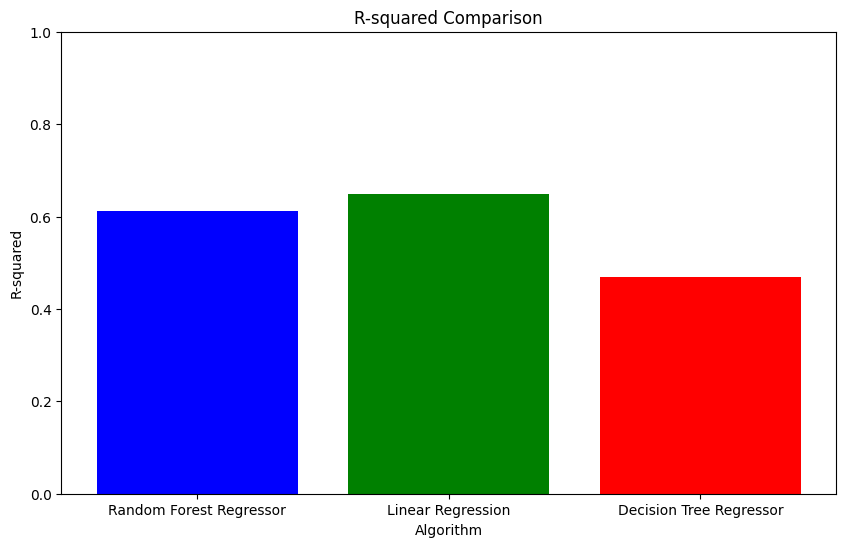

In [ ]:
import matplotlib.pyplot as plt
algorithms = ['Random Forest Regressor','Linear Regression', 'Decision Tree Regressor']
r2_scores = [r2_test_rf, r2_test_lr, r2_test_dt]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, r2_scores, color=['blue', 'green', 'red'])
plt.title('R-squared Comparison')
plt.xlabel('Algorithm')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.show()


* ## From the above chart based on the R-squared scores provided, the best model is Linear Regression with an R-squared of 0.6495. This means that the Linear Regression model explains approximately 64.95% of the variance in the housing prices.


* ## The Linear Regression model has the Lowest MAE score as compared to other models. Therefore it is the best model in this scenario.

* ## In addition based on the MSE scores provided, the best model is Linear Regression with an MSE of 1771751116594.04. This means that, on average, the squared difference between the predicted and actual house prices is the lowest for the Linear Regression model compared to the other two models.